# 1. Import and Install Dependencies

## 1.1 Install Dependencies

In [67]:
#!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 tensorflow-io matplotlib==3.7.*

## 1.2 Load Dependencies

In [201]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
from classify_utilities import AudioProcessor
import pandas as pd
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
import librosa
import numpy as np
import joblib
import random


In [69]:
print(tf.config.list_physical_devices('GPU'))

[]


# 2. Preprocess the Data

## 2.1 Define Paths to Files

In [70]:
DATA_DIR = 'data'
METADATA = os.path.join("metadata.csv")
MODEL_PATH = os.path.join("model", "model.keras")
LABELER_PATH = os.path.join("model", "label_encoder.joblib")
CAPUCHIN_FILE = os.path.join(DATA_DIR, 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NOT_CAPUCHIN_FILE = os.path.join(DATA_DIR, 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav'),

In [229]:
SLICE_LENGTH = 3 # seconds
NUM_CHANNELS = 1
SAMPLE_RATE = 22050

N_MELS = 128
NFFT = 2048
FMAX = 11000
HOP_LENGTH = 512

EPOCHS = 10
BATCH_SIZE = 32

In [72]:
audio_processor = AudioProcessor(sample_rate=SAMPLE_RATE, 
                                 n_mels = N_MELS,
                                 fmax = FMAX,
                                 n_fft = NFFT,
                                 hop_length = HOP_LENGTH, 
                                 slice_length = SLICE_LENGTH,
                                 )
                

## 2.2 Label Encoding

In [73]:
label_encoder = OneHotEncoder()

classes = os.listdir(DATA_DIR)
classes.sort()
classes = np.array(classes).reshape(-1, 1)

label_encoder.fit(classes)
#labels = label_encoder.transform(classes).toarray()
#original_data = label_encoder.inverse_transform(labels)

# Serialize and save the fitted encoder
joblib.dump(label_encoder, LABELER_PATH)

def idx2label(idx):
    idx_reshaped = np.array(idx).reshape(1, -1)
    return label_encoder.inverse_transform(idx_reshaped)[0][0]

def label2idx(label):
    label = np.array(label).reshape(-1, 1)
    return label_encoder.transform(label).toarray()[0]

In [74]:
label2idx('Parsed_Capuchinbird_Clips')

array([0., 1., 0.])

In [75]:
idx2label(label2idx('Parsed_Capuchinbird_Clips'))

'Parsed_Capuchinbird_Clips'

In [76]:
# External labeler
audio_processor.idx2label([1., 0., 0.], joblib.load(LABELER_PATH))

'Forest Recordings'

## 2.3 Exploratory data analysis

### Produce metadata dataframe

In [77]:
# Analyze dataset:
# List all the files in dictionare and subdictionaries.
metadata = []

for root, _, files in os.walk(DATA_DIR):
    for i, file in enumerate(files):
        if file.endswith('.wav'):
            filename = os.path.join(root, file)
            label = os.path.basename(root)
            class_ = label2idx(label)
            num_channels, sample_rate, bit_depth, avg_rms, length_in_seconds, length_in_frames = audio_processor.read_file_properties(filename)
            metadata.append({
                'filename': filename, 
                'label': label, 
                'class': class_,
                'num_channels': num_channels, 
                'sample_rate': sample_rate, 
                'bit_depth': bit_depth, 
                'avg_rms': avg_rms, 
                'length_in_seconds': length_in_seconds, 
                'length_in_frames': length_in_frames
            })

            print(f"Processed {i} file. {file}")
        else:
            print(f"Skipped {i} file. {file}")
            
metadata = pd.DataFrame(metadata)
metadata.to_csv(METADATA, index=False)

Skipped 0 file. recording_00.mp3
Skipped 1 file. recording_01.mp3
Skipped 2 file. recording_02.mp3
Skipped 3 file. recording_03.mp3
Skipped 4 file. recording_04.mp3
Skipped 5 file. recording_05.mp3
Skipped 6 file. recording_06.mp3
Skipped 7 file. recording_07.mp3
Skipped 8 file. recording_08.mp3
Skipped 9 file. recording_09.mp3
Skipped 10 file. recording_10.mp3
Skipped 11 file. recording_11.mp3
Skipped 12 file. recording_12.mp3
Skipped 13 file. recording_13.mp3
Skipped 14 file. recording_14.mp3
Skipped 15 file. recording_15.mp3
Skipped 16 file. recording_16.mp3
Skipped 17 file. recording_17.mp3
Skipped 18 file. recording_18.mp3
Skipped 19 file. recording_19.mp3
Skipped 20 file. recording_20.mp3
Skipped 21 file. recording_21.mp3
Skipped 22 file. recording_22.mp3
Skipped 23 file. recording_23.mp3
Skipped 24 file. recording_24.mp3
Skipped 25 file. recording_25.mp3
Skipped 26 file. recording_26.mp3
Skipped 27 file. recording_27.mp3
Skipped 28 file. recording_28.mp3
Skipped 29 file. recordi

Processed 14 file. XC16803-1.wav
Processed 15 file. XC16803-2.wav
Processed 16 file. XC16804-0.wav
Processed 17 file. XC16804-1.wav
Processed 18 file. XC168899-0.wav
Processed 19 file. XC178167-0.wav
Processed 20 file. XC178167-1.wav
Processed 21 file. XC178167-2.wav
Processed 22 file. XC178167-3.wav
Processed 23 file. XC178168-0.wav
Processed 24 file. XC178168-1.wav
Processed 25 file. XC178168-2.wav
Processed 26 file. XC178168-3.wav
Processed 27 file. XC178168-4.wav
Processed 28 file. XC178168-5.wav
Processed 29 file. XC178168-6.wav
Processed 30 file. XC178168-7.wav
Processed 31 file. XC201990-0.wav
Processed 32 file. XC201990-1.wav
Processed 33 file. XC201990-2.wav
Processed 34 file. XC201990-3.wav
Processed 35 file. XC201990-4.wav
Processed 36 file. XC201990-5.wav
Processed 37 file. XC216010-0.wav
Processed 38 file. XC216010-1.wav
Processed 39 file. XC216010-2.wav
Processed 40 file. XC216010-3.wav
Processed 41 file. XC216010-4.wav
Processed 42 file. XC216010-5.wav
Processed 43 file.

### Observe the data

In [78]:
metadata.head()

,filename,label,class,num_channels,sample_rate,bit_depth,avg_rms,length_in_seconds,length_in_frames
0,data\Parsed_Capuchinbird_Clips\XC114131-0.wav,Parsed_Capuchinbird_Clips,"[0.0, 1.0, 0.0]",2,48000,16,0.008838,2.5,120000
1,data\Parsed_Capuchinbird_Clips\XC114131-1.wav,Parsed_Capuchinbird_Clips,"[0.0, 1.0, 0.0]",2,48000,16,0.007954,3.0,144000
2,data\Parsed_Capuchinbird_Clips\XC114131-2.wav,Parsed_Capuchinbird_Clips,"[0.0, 1.0, 0.0]",2,48000,16,0.007164,3.5,168000
3,data\Parsed_Capuchinbird_Clips\XC114131-3.wav,Parsed_Capuchinbird_Clips,"[0.0, 1.0, 0.0]",2,48000,16,0.007278,3.0,144000
4,data\Parsed_Capuchinbird_Clips\XC114131-4.wav,Parsed_Capuchinbird_Clips,"[0.0, 1.0, 0.0]",2,48000,16,0.006439,3.5,168000


### class balance

In [79]:
print(metadata["label"].value_counts())

label
Parsed_Not_Capuchinbird_Clips    593
Parsed_Capuchinbird_Clips        217
Name: count, dtype: int64


### plot class waveforms

data\Parsed_Capuchinbird_Clips\XC114131-0.wav
data\Parsed_Not_Capuchinbird_Clips\afternoon-birds-song-in-forest-0.wav


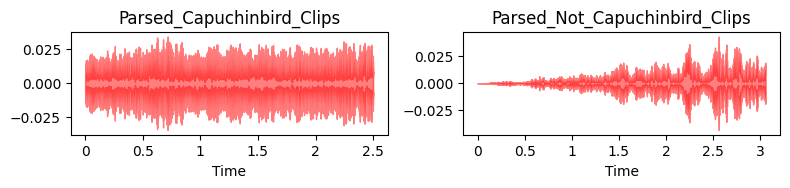

In [80]:
labels = metadata["label"].unique()

fig = plt.figure(figsize=(8,8))

fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, label in enumerate(labels):
    filtered_df = metadata[metadata["label"] == label]
    slice_file_name = filtered_df["filename"].iloc[0]
    fold = filtered_df["label"].iloc[0]
    fig.add_subplot(5, 2, i+1)
    plt.title(label)
    data, sr = librosa.load(os.path.join(slice_file_name))
    librosa.display.waveshow(y = data, sr=sr, color="r", alpha=0.5, label='Harmonic')
    print(slice_file_name)
     
plt.tight_layout()  # This will adjust spacing between subplots to prevent overlap
plt.show()  # This will display the plot

In [81]:
# num of channels 
print("Channels: ")
print(metadata.num_channels.value_counts(normalize=True))
print("\n")

# sample rates 
print("Sample Rates: ")
print(metadata.sample_rate.value_counts(normalize=True))
print("\n")

# bit depth
print("Bit Depth: ")
print(metadata.bit_depth.value_counts(normalize=True))
print("\n")

# length in samples
print("Samples: ")
print(metadata.length_in_frames.describe())
print("\n")

# length in seconds
print("Length (s): ")
print(metadata.length_in_seconds.describe())

# RMS
# print(audiodf.avg_rms.describe())


Channels: 
num_channels
2    0.858025
1    0.141975
Name: proportion, dtype: float64


Sample Rates: 
sample_rate
44100    0.867901
48000    0.118519
11025    0.013580
Name: proportion, dtype: float64


Bit Depth: 
bit_depth
16    1.0
Name: proportion, dtype: float64


Samples: 
count       810.000000
mean     139634.708642
std       19752.190954
min       22050.000000
25%      133138.000000
50%      134460.000000
75%      143545.000000
max      220500.000000
Name: length_in_frames, dtype: float64


Length (s): 
count    810.000000
mean       3.162455
std        0.314040
min        2.000000
25%        3.010998
50%        3.048005
75%        3.180998
max        5.000000
Name: length_in_seconds, dtype: float64


## 2.4 Audio Preprocessing:

### Test audio preprocessing methods
-   Librosa -> 
        SR: 22050
        channel: 1
    trim/pad ->
        length: 3s (3x22050)
    spectrogram ->
        mel-spectrogram / spectrogram / MFCC
    post-process ->
        to Db (log scale, more apparent patterns)
        abs 
    normalize ->
        
        


audio_file shape (66150,) - (frames, channels)
audio_file sample rate 22050 Hz
Spectrogram shape (128, 130) - (mels/frequency, frames/time)
spectrogram min: 0.0 spectrogram max: 65.81294250488281, average: 36.97118377685547
spectrogram dtype: float32
audio dtype: float32 - bit depth


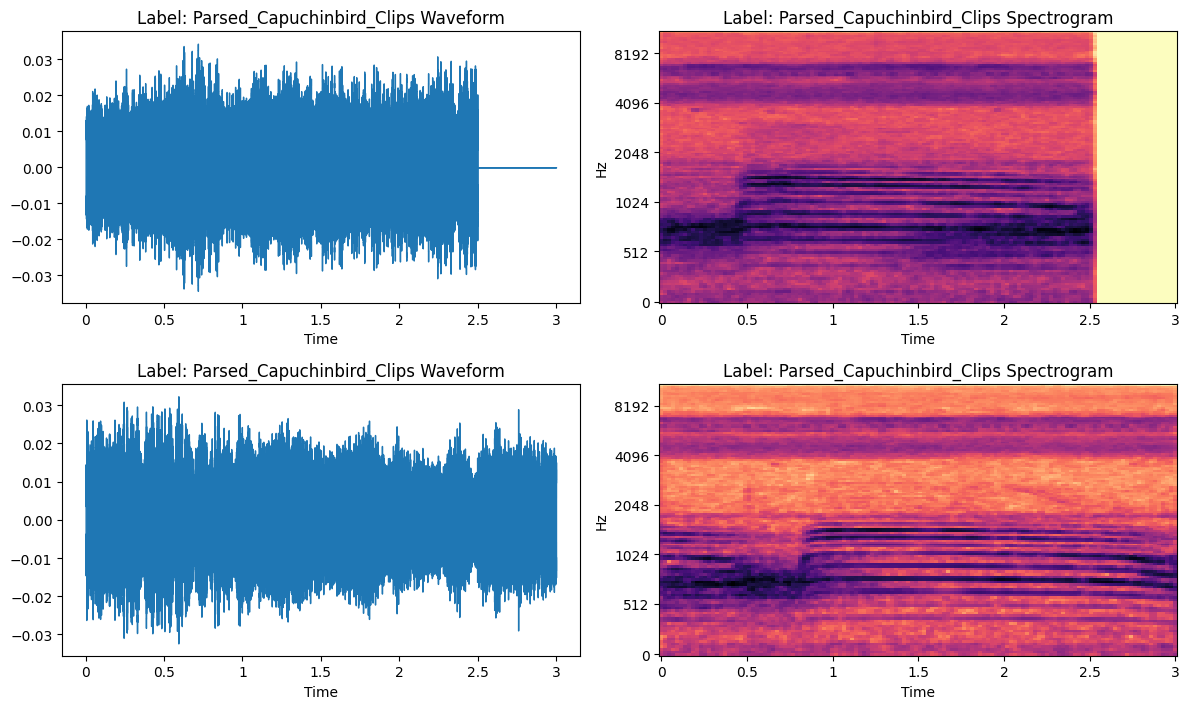

In [82]:
# Test the Fourier transform
#In each iteration of the loop, the variable index is assigned the index value of the current row, and the variable row is assigned the data of the current row (as a Series object).
rows = metadata.iloc[[0, 1]]
#rows = metadata.sample(2)
slice_length = 3
samples_show = len(rows)
pass_ = 0

fig, axes = plt.subplots(nrows=samples_show, ncols=2, figsize=(12, samples_show* 3.6))

for i, row in rows.iterrows():    
    if pass_ > samples_show:
        break
    audio_file, librosa_sample_rate = librosa.load(row["filename"], sr=SAMPLE_RATE)
    if slice_length: 
        sample_length = slice_length * librosa_sample_rate

        audio_file = audio_file[:sample_length]
        if len(audio_file) < sample_length:
            audio_file = np.pad(audio_file, (0, sample_length - len(audio_file)), constant_values=0)

    spectrogram = librosa.feature.melspectrogram(y=audio_file, sr=librosa_sample_rate, n_mels=128, fmax = 11000, n_fft=2048, hop_length=512)
    spectrogram = (librosa.power_to_db(spectrogram, ref=np.max))
    spectrogram = np.abs(spectrogram)

    #scaler = StandardScaler()
    #spectrogram = scaler.fit_transform(spectrogram.T)
    #spectrogram = spectrogram.T # transpose back to original shape for display purpocess

        # wave Plot
    axes[pass_, 0].set_title(f"Label: {row['label']} Waveform")
    librosa.display.waveshow(audio_file, sr=librosa_sample_rate, ax=axes[pass_, 0])
    # spectrogram plot
    axes[pass_, 1].set_title(f"Label: {row['label']} Spectrogram")
    img = librosa.display.specshow(spectrogram, sr=librosa_sample_rate, x_axis='time', y_axis='mel', ax=axes[pass_, 1])
    pass_ += 1


print(f"audio_file shape {audio_file.shape} - (frames, channels)")
print(f"audio_file sample rate {librosa_sample_rate} Hz")
print(f"Spectrogram shape {spectrogram.shape} - (mels/frequency, frames/time)")
print(f"spectrogram min: {spectrogram.min()} spectrogram max: {spectrogram.max()}, average: {spectrogram.mean()}")
print(f"spectrogram dtype: {spectrogram.dtype}")
print(f"audio dtype: {audio_file.dtype} - bit depth")

#fig.colorbar(img, ax=axes[:, 0], format='%+2.0f dB')
plt.tight_layout()
plt.show()

### Preprocessing function

In [83]:
def extract_features(row):
    
    class_label = row["class"]
    
    audio_file,_ = librosa.load(row["filename"], sr=SAMPLE_RATE)

    spectrogram = audio_processor(
        data = audio_file)
    
    shape = spectrogram.shape

    return spectrogram, class_label, shape

## 3 Produce Dataset

## 3.1 Extract features and labels into dataframe

In [84]:
#In each iteration of the loop, the variable index is assigned the index value of the current row, and the variable row is assigned the data of the current row (as a Series object).
features = []

for index, row in metadata.iterrows():
    features.append(extract_features(row))
    print(f"Processed {index} file. {row['filename']}")
    
dataset_df = pd.DataFrame(features, columns=["features", "class_label", "shape"])
print('Finished feature extraction from ', len(dataset_df), ' files') 

Processed 0 file. data\Parsed_Capuchinbird_Clips\XC114131-0.wav
Processed 1 file. data\Parsed_Capuchinbird_Clips\XC114131-1.wav
Processed 2 file. data\Parsed_Capuchinbird_Clips\XC114131-2.wav
Processed 3 file. data\Parsed_Capuchinbird_Clips\XC114131-3.wav
Processed 4 file. data\Parsed_Capuchinbird_Clips\XC114131-4.wav
Processed 5 file. data\Parsed_Capuchinbird_Clips\XC114132-0.wav
Processed 6 file. data\Parsed_Capuchinbird_Clips\XC114132-1.wav
Processed 7 file. data\Parsed_Capuchinbird_Clips\XC114132-2.wav
Processed 8 file. data\Parsed_Capuchinbird_Clips\XC114132-3.wav
Processed 9 file. data\Parsed_Capuchinbird_Clips\XC114132-4.wav
Processed 10 file. data\Parsed_Capuchinbird_Clips\XC114132-5.wav
Processed 11 file. data\Parsed_Capuchinbird_Clips\XC114132-6.wav
Processed 12 file. data\Parsed_Capuchinbird_Clips\XC119294-0.wav
Processed 13 file. data\Parsed_Capuchinbird_Clips\XC16803-0.wav
Processed 14 file. data\Parsed_Capuchinbird_Clips\XC16803-1.wav
Processed 15 file. data\Parsed_Capuch

In [85]:
dataset_df.head()

,features,class_label,shape
0,"[[39.204254, 34.635555, 33.70051, 41.397346, 4...","[0.0, 1.0, 0.0]","(130, 128)"
1,"[[33.50185, 33.970173, 37.416996, 42.786285, 4...","[0.0, 1.0, 0.0]","(130, 128)"
2,"[[37.29862, 35.41981, 38.162216, 37.41725, 39....","[0.0, 1.0, 0.0]","(130, 128)"
3,"[[37.31181, 39.333588, 33.57983, 32.58475, 30....","[0.0, 1.0, 0.0]","(130, 128)"
4,"[[36.56505, 35.18927, 35.987934, 43.979122, 40...","[0.0, 1.0, 0.0]","(130, 128)"


In [86]:
dataset_df["shape"].value_counts()

shape
(130, 128)    810
Name: count, dtype: int64

## 3.2 Train Test Split

In [87]:
X = np.array(dataset_df.features.tolist())
y = np.array(dataset_df.class_label.tolist())
X.shape

(810, 130, 128)

In [88]:
print(f"randomm feature example: {X[0]} and label: {y[0]}")

randomm feature example: [[39.204254 34.635555 33.70051  ... 55.741714 55.878456 54.770035]
 [33.23125  33.159348 31.82422  ... 52.28985  52.641483 53.824184]
 [37.342316 32.56627  33.13391  ... 48.73897  55.95368  54.527172]
 ...
 [80.       80.       80.       ... 80.       80.       80.      ]
 [80.       80.       80.       ... 80.       80.       80.      ]
 [80.       80.       80.       ... 80.       80.       80.      ]] and label: [0. 1. 0.]


In [89]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 42)

## 3.3 Reshape sets for NN input layer

In [182]:
x_train = x_train.reshape(x_train.shape[0], 130, N_MELS, NUM_CHANNELS)
x_test = x_test.reshape(x_test.shape[0], 130, N_MELS, NUM_CHANNELS)

num_labels = y.shape[1]
print(f"num_labels: {num_labels}")
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

648
num_labels: 3
x_train shape: (648, 130, 128, 1)
y_train shape: (648, 3)


# 4. Build Deep Learning Model

## 4.1 Load Tensorflow Dependencies

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall

## 7.2 Build Sequential Model

In [98]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(130, N_MELS, NUM_CHANNELS)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_labels, activation='softmax'))

In [100]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [101]:
model.compile(
    optimizer=optimizer, 
    loss='CategoricalCrossentropy', 
    metrics=['accuracy', Precision(), Recall()]
    )

In [102]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 126, 16)      160       
                                                                 
 conv2d_21 (Conv2D)          (None, 126, 124, 16)      2320      
                                                                 
 flatten_10 (Flatten)        (None, 249984)            0         
                                                                 
 dense_20 (Dense)            (None, 128)               31998080  
                                                                 
 dense_21 (Dense)            (None, 3)                 387       
                                                                 
Total params: 32,000,947
Trainable params: 32,000,947
Non-trainable params: 0
_________________________________________________________________


## 4.3 Fit Model, View Loss and KPI Plots

In [103]:
hist = model.fit(x_train, 
                 y_train, 
                 epochs=EPOCHS, 
                 validation_data=(x_test, y_test), 
                 batch_size=BATCH_SIZE
                 )

Epoch 1/10


21/21 [==============================] - 9s 379ms/step - loss: 183.1703 - accuracy: 0.7160 - precision: 0.7160 - recall: 0.7160 - val_loss: 4.3342 - val_accuracy: 0.9321 - val_precision: 0.9321 - val_recall: 0.9321
Epoch 2/10
21/21 [==============================] - 8s 361ms/step - loss: 0.9923 - accuracy: 0.9537 - precision: 0.9537 - recall: 0.9537 - val_loss: 0.2702 - val_accuracy: 0.9877 - val_precision: 0.9877 - val_recall: 0.9877
Epoch 3/10
21/21 [==============================] - 8s 362ms/step - loss: 0.0897 - accuracy: 0.9861 - precision: 0.9861 - recall: 0.9861 - val_loss: 0.2084 - val_accuracy: 0.9630 - val_precision: 0.9630 - val_recall: 0.9630
Epoch 4/10
21/21 [==============================] - 8s 366ms/step - loss: 0.0153 - accuracy: 0.9938 - precision: 0.9938 - recall: 0.9938 - val_loss: 0.1562 - val_accuracy: 0.9691 - val_precision: 0.9691 - val_recall: 0.9691
Epoch 5/10
21/21 [==============================] - 8s 373ms/step - loss: 0.0068 - accuracy: 0.9985 - precision: 

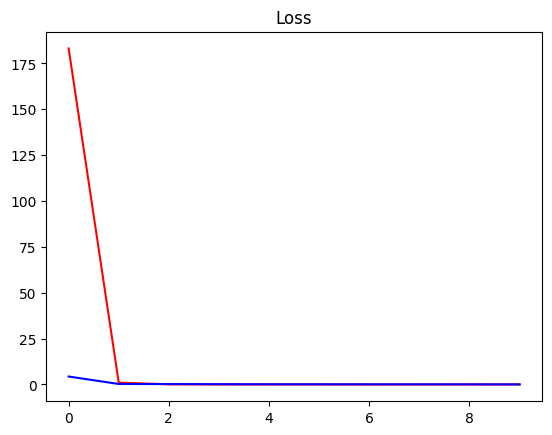

In [104]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

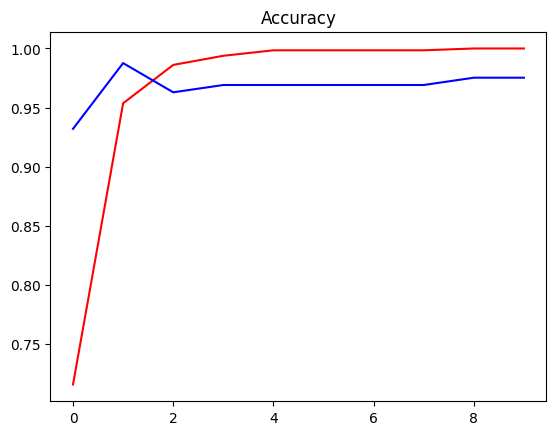

In [105]:
plt.title('Accuracy')
plt.plot(hist.history['accuracy'], 'r')
plt.plot(hist.history['val_accuracy'], 'b')
plt.show()

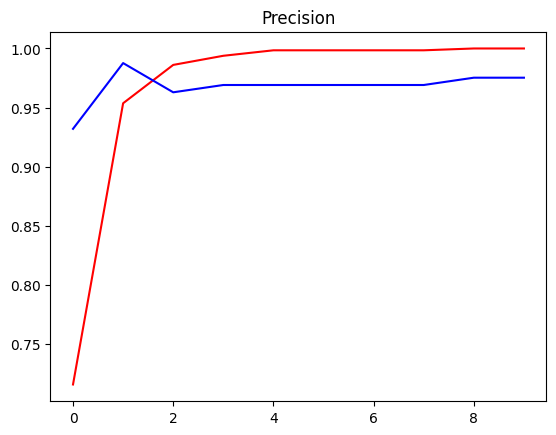

In [106]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

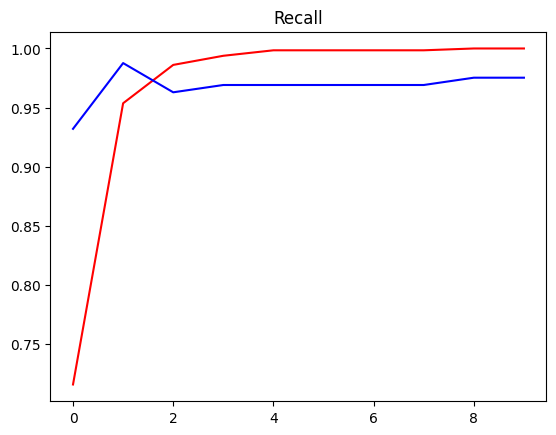

In [107]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

# 5. Make a Prediction on a Single Clip

## 5.1 Make a Prediction, Evaluate

In [141]:
predictions = model.predict(x_test)

6/6 [==============================] - 0s 35ms/step


In [177]:
print(idx2label(predictions[2]))
print(idx2label(y_test[21]))
print(f"input default shape: {x_test[1].shape}")
print(f"reshaped input feature shape: {np.expand_dims((x_test[21]), axis=0).shape}")

Parsed_Not_Capuchinbird_Clips
Parsed_Capuchinbird_Clips
input default shape: (130, 128, 1)
reshaped input feature shape: (1, 130, 128, 1)


In [169]:
prediction = model.predict(np.expand_dims((x_test[21]), axis=0))
print(prediction)
print(idx2label(prediction))

1/1 [==============================] - 0s 38ms/step
[[0.000000e+00 1.000000e+00 6.589354e-24]]
(1, 3)
Parsed_Capuchinbird_Clips


In [144]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=1)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=1)
print("Testing Accuracy: ", score[1])

21/21 [==============================] - 1s 37ms/step - loss: 4.2488e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Training Accuracy:  1.0
6/6 [==============================] - 0s 33ms/step - loss: 0.0562 - accuracy: 0.9753 - precision: 0.9753 - recall: 0.9753
Testing Accuracy:  0.9753086566925049


## 5.2 Save Model

In [146]:
model.save(MODEL_PATH)

# 6. Inference 

## 6.1 Load local model and labels

In [149]:
# Load the encoder in the inference environment
loaded_encoder = joblib.load(LABELER_PATH)
model = tf.keras.models.load_model(MODEL_PATH)

## 6.1 Inference on loacl files

In [192]:
test_data_dir = os.path.join('test')

audio_files = os.listdir(test_data_dir)
random.shuffle(audio_files)

print(audio_files[1])
audio_labels = [os.path.splitext(file)[0] for file in audio_files]

birds-singing-in-forest-sounds-0.wav


In [200]:
for file in audio_files:
    path = os.path.join(test_data_dir, file)
    print(path)
    data, _ = librosa.load(path, sr=SAMPLE_RATE)
    prediction_feature = audio_processor(
            data = data
        )
    
    # Reshape to match model input shape
    prediction_feature = prediction_feature.reshape(1, 130, N_MELS, NUM_CHANNELS)
    predicted_class = idx2label(model.predict(prediction_feature)) 
    print("The predicted class is:", predicted_class, '\n') 



test\birds-singing-in-forest-sounds-1.wav
1/1 [==============================] - 0s 39ms/step
The predicted class is: Parsed_Not_Capuchinbird_Clips 

test\birds-singing-in-forest-sounds-0.wav
1/1 [==============================] - 0s 40ms/step
The predicted class is: Parsed_Not_Capuchinbird_Clips 

test\birds-singing-in-forest-sounds-4.wav
1/1 [==============================] - 0s 30ms/step
The predicted class is: Parsed_Not_Capuchinbird_Clips 

test\birds-singing-in-forest-sounds-6.wav
1/1 [==============================] - 0s 32ms/step
The predicted class is: Parsed_Not_Capuchinbird_Clips 

test\XC9221-1.wav
1/1 [==============================] - 0s 33ms/step
The predicted class is: Parsed_Capuchinbird_Clips 

test\afternoon-birds-song-in-forest-34.wav
1/1 [==============================] - 0s 31ms/step
The predicted class is: Parsed_Not_Capuchinbird_Clips 

test\XC16804-1.wav
1/1 [==============================] - 0s 33ms/step
The predicted class is: Parsed_Capuchinbird_Clips 

test

## 6.2 Real time inference

In [232]:
from inference import SoundClassificationService

def main():

    config = {
        "model_path": MODEL_PATH,
        "labeler_path": LABELER_PATH,
        
        "sample_rate": SAMPLE_RATE,
        "num_channels": NUM_CHANNELS,
        "slice_length": SLICE_LENGTH,
        
        "num_mels": N_MELS,
        "n_fft": NFFT,
        "fmax": FMAX,
        "hop_length": HOP_LENGTH,
        
        "confidence_threshold": 0.5,
        "listening_hop_length": 0.6,
        "device": "cpu"

    }

    service = SoundClassificationService.get_instance(config)
    service.listen_and_predict()


if __name__ == "__main__":
    main()

Listening... Press Ctrl+C to stop.
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "d:\Code\ProjectsPython\ML_TrainingGround\ML_Audio\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ondre\AppData\Local\Temp\ipykernel_9300\3705708896.py", line 29, in <module>
    main()
  File "C:\Users\ondre\AppData\Local\Temp\ipykernel_9300\3705708896.py", line 25, in main
    service.listen_and_predict()
  File "d:\Code\ProjectsPython\ML_TrainingGround\ML_Audio\Tensorflow\Audio_Classification(Clinging)\inference.py", line 87, in listen_and_predict
  File "d:\Code\ProjectsPython\ML_TrainingGround\ML_Audio\Tensorflow\Audio_Classification(Clinging)\inference.py", line 54, in preprocess
    print(f"Error while recording: {e}")
KeyError: 'num_mfcc'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "d:\Code\ProjectsPython\ML_TrainingGround\ML_Audio\.venv\lib\site-packages\IPython\co

In [231]:
import argparse
from inference import SoundClassificationService

def main():
    parser = argparse.ArgumentParser(description="Audio Classification Service")
    parser.add_argument("--model_path", type=str, default=MODEL_PATH, help="Path to the trained model file")
    parser.add_argument("--labeler_path", type=str, default=LABELER_PATH, help="Path to labeler file")
    parser.add_argument("--sample_rate", type=int, default=SAMPLE_RATE, help="Audio sample rate")
    parser.add_argument("--num_channels", type=int, default=NUM_CHANNELS, help="Number of audio channels")
    parser.add_argument("--audio_length", type=float, default=SLICE_LENGTH, help="Length of audio slice in seconds")
    parser.add_argument("--num_mels", type=int, default=N_MELS, help="Number of Mel bands to generate")
    parser.add_argument("--n_fft", type=int, default=NFFT, help="Number of samples in each FFT window")
    parser.add_argument("--fmax", type=int, default=FMAX, help="Maximum frequency when computing MEL spectrograms")
    parser.add_argument("--hop_length", type=int, default=HOP_LENGTH, help="Number of samples between successive FFT windows")
    parser.add_argument("--confidence_threshold", type=float, default=0.6, help="Confidence threshold for making predictions")
    parser.add_argument("--listening_hop_length", type=float, default=0.5, help="Hop length for listening in seconds")
    
    args = parser.parse_args()

    config = {
        "model_path": args.model_path,
        "labeler_path": args.labeler_path,
        
        "sample_rate": args.sample_rate,
        "num_channels": args.num_channels,
        "slice_length": args.audio_length,
        
        "num_mels": args.num_mels,
        "n_fft": args.n_fft,
        "fmax": args.fmax,
        "hop_length": args.hop_length,
        
        "confidence_threshold": args.confidence_threshold,
        "listening_hop_length": args.listening_hop_length,
        "device": "cpu"

    }

    service = SoundClassificationService.get_instance(config)
    service.listen_and_predict()


if __name__ == "__main__":
    main()

usage: ipykernel_launcher.py [-h] [--model_path MODEL_PATH]
                             [--labeler_path LABELER_PATH]
                             [--sample_rate SAMPLE_RATE]
                             [--num_channels NUM_CHANNELS]
                             [--audio_length AUDIO_LENGTH]
                             [--num_mels NUM_MELS] [--n_fft N_FFT]
                             [--fmax FMAX] [--hop_length HOP_LENGTH]
                             [--confidence_threshold CONFIDENCE_THRESHOLD]
                             [--listening_hop_length LISTENING_HOP_LENGTH]
ipykernel_launcher.py: error: argument --fmax: invalid int value: 'c:\\Users\\ondre\\AppData\\Roaming\\jupyter\\runtime\\kernel-v2-18328aJSqYXI4Omlt.json'


AttributeError: 'tuple' object has no attribute 'tb_frame'